In [67]:
import pandas as pd
import requests
from datetime import datetime
from datetime import date
import seaborn as sns

In [2]:
query = open('main_query.txt', 'r').read()
response_data = []
github_token = open('env', 'r').read()
headers = { 'Authorization': f'bearer {github_token}' }

In [3]:
def makeRequest(query):
    print('Start making query')
    page = 0
    previous_cursor = 'null'
    while(page < 10):        
        print(f'Current page {page}')
        response = requests.post('https://api.github.com/graphql', headers=headers, json={'query':query})
        if response.status_code == 200:
            response_json = response.json()['data']['search']
            nodes = response_json['nodes']
            end_cursor = response_json['pageInfo']['endCursor']
            query = query.replace(previous_cursor, f'"{end_cursor}"')
            previous_cursor = f'"{end_cursor}"'
            print(previous_cursor)
            for item in nodes:
                response_data.append(item)
            print(f'Quantity of total nodes: {len(response_data)}')
            page += 1
        else:
            print(f'Some error has happened, status code:  {response.status_code}')
   

       
        
makeRequest(query)

Start making query
Current page 0
"Y3Vyc29yOjEwMA=="
Quantity of total nodes: 100
Current page 1
"Y3Vyc29yOjIwMA=="
Quantity of total nodes: 200
Current page 2
"Y3Vyc29yOjMwMA=="
Quantity of total nodes: 300
Current page 3
"Y3Vyc29yOjQwMA=="
Quantity of total nodes: 400
Current page 4
"Y3Vyc29yOjUwMA=="
Quantity of total nodes: 500
Current page 5
"Y3Vyc29yOjYwMA=="
Quantity of total nodes: 600
Current page 6
"Y3Vyc29yOjcwMA=="
Quantity of total nodes: 700
Current page 7
"Y3Vyc29yOjgwMA=="
Quantity of total nodes: 800
Current page 8
"Y3Vyc29yOjkwMA=="
Quantity of total nodes: 900
Current page 9
"Y3Vyc29yOjEwMDA="
Quantity of total nodes: 1000


In [4]:
def convertJsonToDataFrame(response_data):
    df = pd.json_normalize(response_data)
    print('Finished converting json to csv')
    return df

df = convertJsonToDataFrame(response_data)

Finished converting json to csv


In [53]:
df.head()

,stargazerCount,createdAt,name,updatedAt,url,open_issues.totalCount,closed_issues.totalCount,primaryLanguage.name,pullRequests.totalCount,releases.totalCount,primaryLanguage
0,329071,2014-12-24T17:49:19Z,freeCodeCamp,2021-08-26T12:40:01Z,https://github.com/freeCodeCamp/freeCodeCamp,15520,15397,JavaScript,15331,0,NaN
1,258404,2019-03-26T07:31:14Z,996.ICU,2021-08-26T12:20:01Z,https://github.com/996icu/996.ICU,0,0,Rust,1020,0,NaN
2,199727,2013-10-11T06:50:37Z,free-programming-books,2021-08-26T12:34:44Z,https://github.com/EbookFoundation/free-progra...,589,569,NaN,3521,0,NaN
3,190358,2016-06-06T02:34:12Z,coding-interview-university,2021-08-26T12:22:42Z,https://github.com/jwasham/coding-interview-un...,276,241,NaN,249,0,NaN
4,187341,2013-07-29T03:24:51Z,vue,2021-08-26T12:40:02Z,https://github.com/vuejs/vue,9552,9232,JavaScript,1046,210,NaN


In [5]:
def removeLastColumn(df):
    df = df.drop(labels='primaryLanguage', axis=1)
    return df
df = removeLastColumn(df)

In [6]:
df.head()

,stargazerCount,createdAt,name,updatedAt,url,open_issues.totalCount,closed_issues.totalCount,primaryLanguage.name,pullRequests.totalCount,releases.totalCount
0,329192,2014-12-24T17:49:19Z,freeCodeCamp,2021-08-28T18:10:57Z,https://github.com/freeCodeCamp/freeCodeCamp,15526,15404,JavaScript,15353,0
1,258476,2019-03-26T07:31:14Z,996.ICU,2021-08-28T15:59:33Z,https://github.com/996icu/996.ICU,0,0,Rust,1020,0
2,200347,2013-10-11T06:50:37Z,free-programming-books,2021-08-28T18:19:46Z,https://github.com/EbookFoundation/free-progra...,593,570,NaN,3524,0
3,190482,2016-06-06T02:34:12Z,coding-interview-university,2021-08-28T18:21:20Z,https://github.com/jwasham/coding-interview-un...,277,242,NaN,250,0
4,187412,2013-07-29T03:24:51Z,vue,2021-08-28T18:19:44Z,https://github.com/vuejs/vue,9553,9233,JavaScript,1046,210


In [7]:
def convertDateToAgeInDays(createdAt):
    current_date = date.today()
    createdAt = datetime.fromisoformat(createdAt.replace('Z', '+00:00')).date()
    return (current_date - createdAt).days
    
df['age'] = df['createdAt'].apply(convertDateToAgeInDays)
df['lastUpdate'] = df['updatedAt'].apply(convertDateToAgeInDays)

In [8]:
df.head()

,stargazerCount,createdAt,name,updatedAt,url,open_issues.totalCount,closed_issues.totalCount,primaryLanguage.name,pullRequests.totalCount,releases.totalCount,age,lastUpdate
0,329192,2014-12-24T17:49:19Z,freeCodeCamp,2021-08-28T18:10:57Z,https://github.com/freeCodeCamp/freeCodeCamp,15526,15404,JavaScript,15353,0,2439,0
1,258476,2019-03-26T07:31:14Z,996.ICU,2021-08-28T15:59:33Z,https://github.com/996icu/996.ICU,0,0,Rust,1020,0,886,0
2,200347,2013-10-11T06:50:37Z,free-programming-books,2021-08-28T18:19:46Z,https://github.com/EbookFoundation/free-progra...,593,570,NaN,3524,0,2878,0
3,190482,2016-06-06T02:34:12Z,coding-interview-university,2021-08-28T18:21:20Z,https://github.com/jwasham/coding-interview-un...,277,242,NaN,250,0,1909,0
4,187412,2013-07-29T03:24:51Z,vue,2021-08-28T18:19:44Z,https://github.com/vuejs/vue,9553,9233,JavaScript,1046,210,2952,0


In [9]:
def convertDataFrameToCsv(response_data):
    print('Dataframe converted to CSV')
    df.to_csv('pandas.csv')

convertDataFrameToCsv(df)

Dataframe converted to CSV


 Median: 2354.0


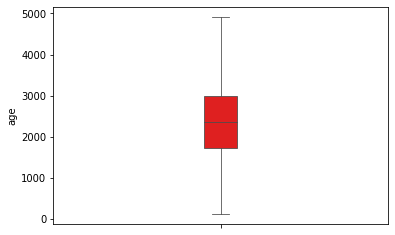

In [80]:
age_box_plot = sns.boxplot(y='age', data=df, color='red', width=0.1, linewidth=0.8)
median = df['age'].median()
print(f' Median: {median}')

In [69]:
age_box_plot.figure.savefig("images/question1_age.png")

In [72]:
q1 = df['age'].quantile(0.25)


In [73]:
q3 = df['age'].quantile(0.75)

In [74]:
iqr = q3 - q1

In [75]:
max = q3 + (1.5 * iqr)
print(max)

4925.375


In [81]:
min = q1 - 1.5 * iqr
print(min)

-197.625
